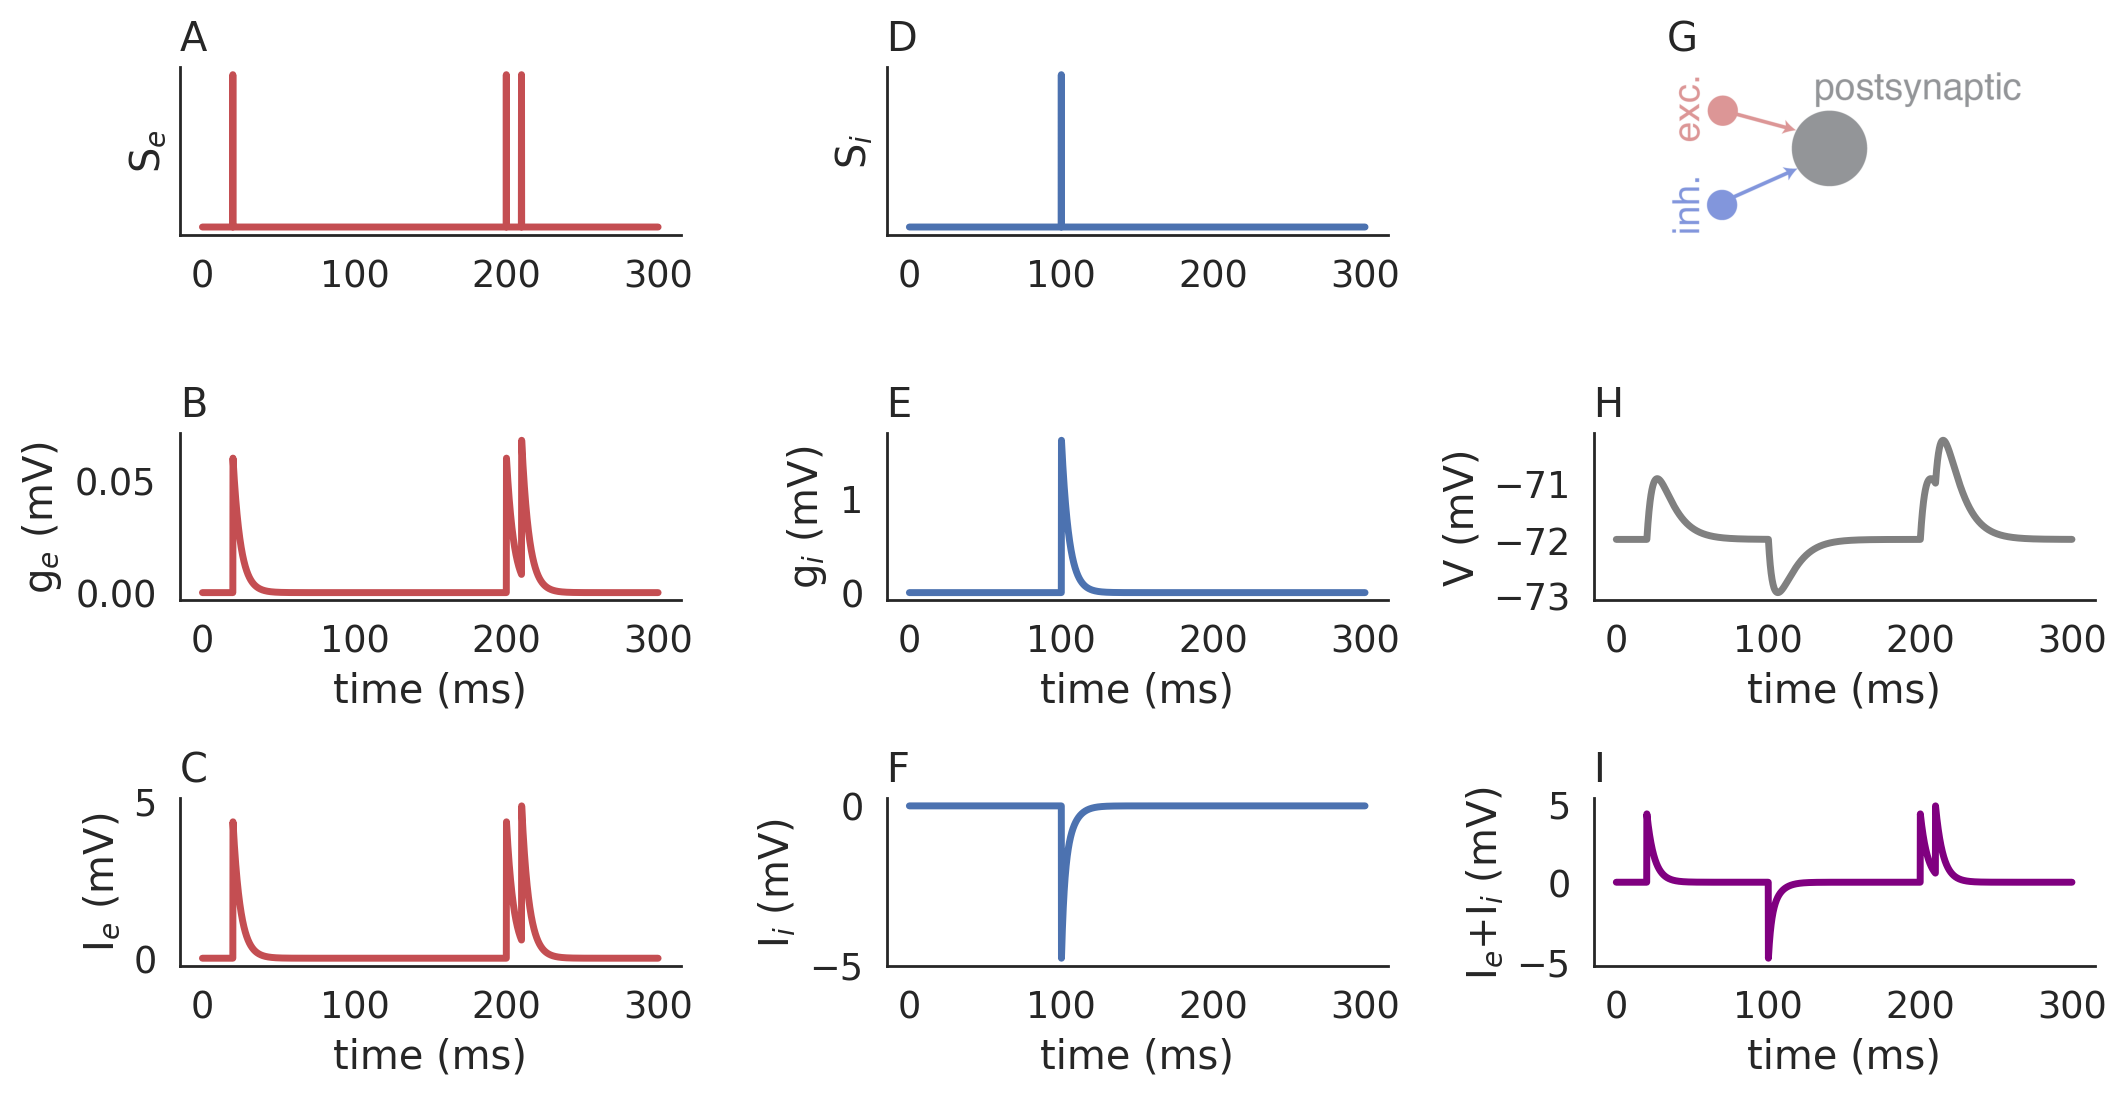

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'

###############################################
###############################################

# This code cell simulates a leaky integrator with conductance-based synapses.
# The next code cell uses a current-based synapse model.

# Discretized time
T=300
dt=.1
time=np.arange(0,T,dt)


# Synapse parameters
Je=.3
Ee=0
taue=5
Ji=8
Ei=-75
taui=5


# Neuron parameters
EL=-72
taum=10


# Presynaptic spike times
ExcSpikeTimes=np.array([20,200,210])
InhSpikeTimes=np.array([100])

# Binarized presynaptic spike train
Se=np.zeros_like(time)
Si=np.zeros_like(time)
Se[(ExcSpikeTimes/dt).astype(int)]=1/dt
Si[(InhSpikeTimes/dt).astype(int)]=1/dt

# External input. Set to zero for now
I0=0
Ix=I0+np.zeros_like(time)

# Euler solver to compute Is and V
ge=np.zeros_like(time)
gi=np.zeros_like(time)
V=np.zeros_like(time)
V[0]=EL
for i in range(len(time)-1):
    V[i+1]=V[i]+dt*(-(V[i]-EL)-ge[i]*(V[i]-Ee)-gi[i]*(V[i]-Ei)+Ix[i])/taum
    ge[i+1]=ge[i]+dt*(-ge[i]+Je*Se[i])/taue
    gi[i+1]=gi[i]+dt*(-gi[i]+Ji*Si[i])/taui


# Define synaptic currents
Ie=-ge*(V-Ee)
Ii=-gi*(V-Ei)



# Make figure
plt.subplots(3,3,figsize=(11, 5.7))

# Raster plot
plt.subplot(3,3,1)
plt.plot(time,Se,color='r')
#plt.xlabel('time (ms)')
plt.ylabel('S$_e$')
plt.title('A',loc='left')
plt.yticks([])
sns.despine()

plt.subplot(3,3,4)
plt.plot(time,ge,color='r')
plt.xlabel('time (ms)')
plt.ylabel('g$_e$ (mV)')
plt.title('B',loc='left')
sns.despine()

plt.subplot(3,3,7)
plt.plot(time,Ie,color='r')
plt.xlabel('time (ms)')
plt.ylabel('I$_e$ (mV)')
plt.title('C',loc='left')
sns.despine()


plt.subplot(3,3,2)
plt.plot(time,Si,color='b')
#plt.xlabel('time (ms)')
plt.ylabel('S$_i$')
plt.title('D',loc='left')
plt.yticks([])
sns.despine()


plt.subplot(3,3,5)
plt.plot(time,gi,color='b')
plt.xlabel('time (ms)')
plt.ylabel('g$_i$ (mV)')
plt.title('E',loc='left')
sns.despine()

plt.subplot(3,3,8)
plt.plot(time,Ii,color='b')
plt.xlabel('time (ms)')
plt.ylabel('I$_i$ (mV)')
plt.title('F',loc='left')
sns.despine()



plt.subplot(3,3,3)
# Get image for plot
try:
    im = plt.imread('../ImageFiles/Synapses.png')
except:
    try:
        url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/ImageFiles/Synapses.png"
        file = np.DataSource().open(url)
        im = plt.imread(file.name)
    except:
        im = 1.0+np.zeros([100,100,3],dtype=np.uint8)
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('G',loc='left')


plt.subplot(3,3,6)
plt.plot(time,V,color='gray')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('H',loc='left')

plt.subplot(3,3,9)
plt.plot(time,Ie+Ii,color='purple')
plt.xlabel('time (ms)')
plt.ylabel('I$_{e}$+I$_{i}$ (mV)')
plt.title('I',loc='left')
sns.despine()


plt.tight_layout()

